## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [2]:
import pandas as pd
df= pd.read_csv('RegData.csv' ,header=None)

In [3]:
df

,0,1
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9
5,6.9,6.1
6,6.1,6.0
7,6.2,5.8
8,6.0,5.2
9,5.1,4.2


#### Explore your data

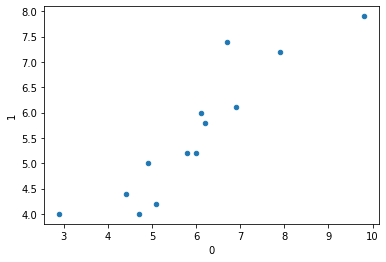

In [4]:
df.plot.scatter(0,1);

#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [5]:
x=df.loc[: , 0].to_numpy()
y=df.loc[:, 1].to_numpy()

In [6]:
print(x)
print(y)

[2.9000001  6.69999981 4.9000001  7.9000001  9.80000019 6.9000001
 6.0999999  6.19999981 6.         5.0999999  4.69999981 4.4000001
 5.80000019]
[4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Explore your data

In [7]:
x

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [8]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

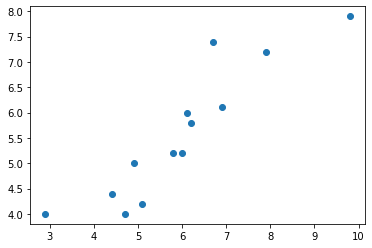

In [9]:
plt.scatter(x, y);

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

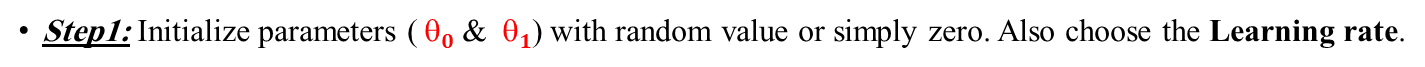

In [10]:
theta_0= 0
theta_1= 0
r=0.001

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.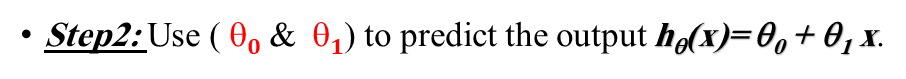
#### Note: you will need to iterate through all data points

In [11]:
h_0 = theta_0 + (theta_1 *x )

In [12]:
print(h_0)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).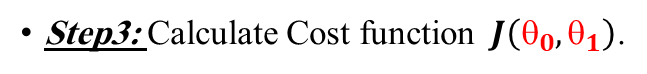
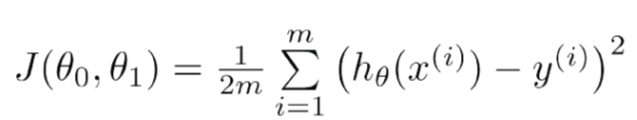

In [13]:
def J(theta_0,theta_1):
    m=len(x)
    cost = (1/(2*m) *(h_0 - y)**2).sum()
    return cost

In [14]:
J(theta_0,theta_1)

16.305384479692318

### Step4: Calculate the gradient.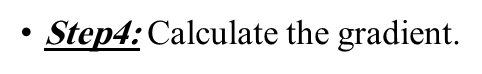
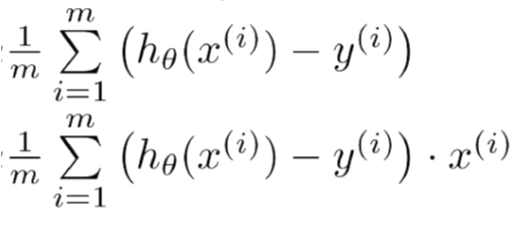

In [15]:
def gradiant(h_0, y):
    m=len(x)
    theta0_grad= (1/m * (h_0 - y)).sum()
    theta1_grad= (1/m * (h_0 - y) * x).sum()
    return theta0_grad, theta1_grad


In [16]:
gradiant(h_0, y)

(-5.56923073976923, -35.04384604321538)

In [17]:
#gradiant(h_0, y)[0]

In [18]:
theta_0_grad , theta_1_grad = gradiant(h_0, y)

In [19]:
print(theta_0_grad , theta_1_grad)

-5.56923073976923 -35.04384604321538


### Step5: Update the parameters (simultaneously).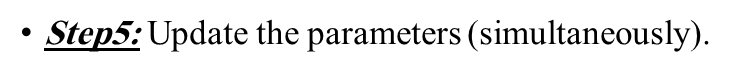
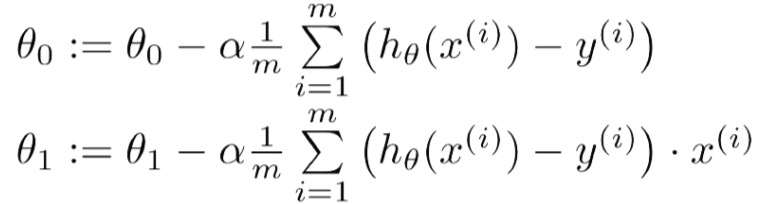

In [20]:
theta_0 = theta_0 - r*theta_0_grad
theta_1 = theta_1 - r*theta_1_grad

In [21]:
theta_0

0.00556923073976923

In [22]:
theta_1

0.03504384604321538

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.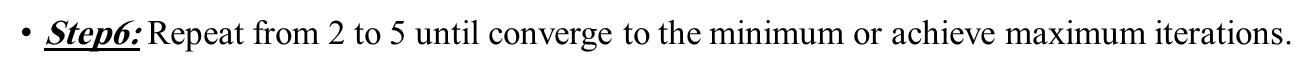

In [23]:
iteration = 1000
theta_0_list=[]
theta_1_list=[]
cost_list=[]
hypothes_list=[]
gradiant_0_list=[]
gradiant_1_list=[]


for i in range(iteration):
    h_0 = theta_0 + (theta_1 *x )
    hypothes_list.append(h_0)
    #print(h_0)
    
    cost= J(theta_0,theta_1)
    cost_list.append(cost)
    
    
    theta_0_grad, theta_1_grad= gradiant(h_0, y)
    gradiant_0_list.append(theta_0_grad)
    gradiant_1_list.append(theta_1_grad)

    
    theta_0_list.append(theta_0)
    theta_1_list.append(theta_1)
    
    theta_0 = theta_0 - r*theta_0_grad
    theta_1 = theta_1 - r*theta_1_grad
    
    if i > 0:
        if abs(cost_list[i-1] - cost_list[i] < 0.0001):
            break
            
        if abs(np.linalg.norm([theta_0_list[i],theta_1_list[i]])-np.linalg.norm([theta_0_list[i-1],theta_1_list[i-1]]))< 0.0001:
            break
        
        if abs(np.linalg.norm([gradiant_0_list[i],gradiant_1_list[i]])-np.linalg.norm([gradiant_0_list[i-1],gradiant_1_list[i-1]])) < 0.0001:
            break
    
    
print('it takes iterations = ', i)

it takes iterations =  120


In [24]:
print(theta_0)
print(theta_1)

0.1499960842169203
0.8881463897205402


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [25]:
y_predict = theta_0 + theta_1 * x
y_predict

array([2.7256207 , 6.10057673, 4.50191348, 7.16635265, 8.85383087,
       6.27820626, 5.56768898, 5.65650353, 5.47887442, 4.67954259,
       4.32428395, 4.05784028, 5.30124531])

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

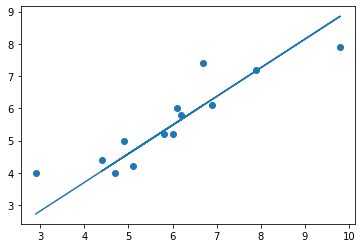

In [26]:
plt.scatter(x,y)
plt.plot(x,y_predict)

#### Use R2 score to evaluate LR equation output
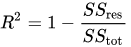
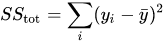
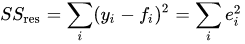
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [27]:
SSot= ((y-y_predict)**2).sum()
print(SSot)

5.251017173316544


In [28]:
SSret= ((y-y.mean())**2).sum()

In [29]:
r2=1-(SSot/SSret)

In [30]:
r2

0.7466665893916266

In [31]:
from sklearn.metrics import r2_score
score=r2_score(y,y_predict)

In [32]:
score

0.7466665893916266

## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

### Plot loss vs. iterations

In [33]:
itertation=[]
for i in range (len(cost_list)):
    itertation.append(i)

Text(0, 0.5, 'Cost')

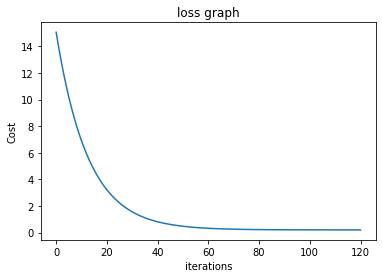

In [34]:
plt.plot(itertation, cost_list)
plt.title('loss graph')
plt.xlabel('iterations')
plt.ylabel('Cost')

Text(0, 0.5, 'Cost')

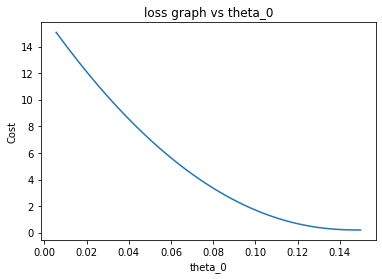

In [35]:
plt.plot(theta_0_list, cost_list)
plt.title('loss graph vs theta_0')
plt.xlabel('theta_0')
plt.ylabel('Cost')

Text(0, 0.5, 'Cost')

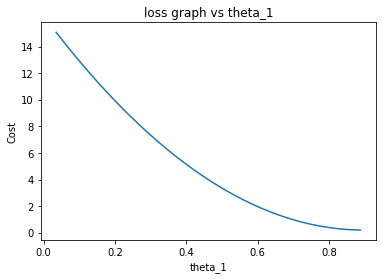

In [36]:
plt.plot(theta_1_list, cost_list)
plt.title('loss graph vs theta_1')
plt.xlabel('theta_1')
plt.ylabel('Cost')

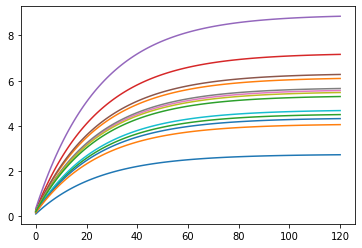

In [37]:
plt.plot(hypothes_list);

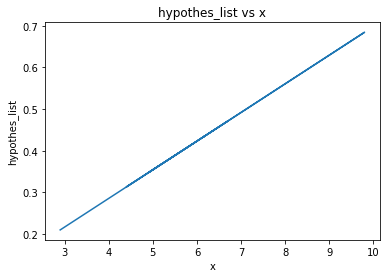

In [38]:
plt.plot(x, hypothes_list[1])
plt.title('hypothes_list vs x')
plt.xlabel('x')
plt.ylabel('hypothes_list');

- loss - epoch
- loss - theta0
- loss - theta1
- x , y with plot
- hypothis ,x 

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [39]:
df2=pd.read_csv('MultipleLR.csv', header=None)
df2

,0,1,2,3
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [40]:
x=df2.iloc[:, :-1]

In [41]:
print (x)

     0   1    2
0   73  80   75
1   93  88   93
2   89  91   90
3   96  98  100
4   73  66   70
5   53  46   55
6   69  74   77
7   47  56   60
8   87  79   90
9   79  70   88
10  69  70   73
11  70  65   74
12  93  95   91
13  79  80   73
14  70  73   78
15  93  89   96
16  78  75   68
17  81  90   93
18  88  92   86
19  78  83   77
20  82  86   90
21  86  82   89
22  78  83   85
23  76  83   71
24  96  93   95


In [42]:
y=df2.iloc[: , -1]

In [43]:
y = np.array(y)
print(y)

[152 185 180 196 142 101 149 115 175 164 141 141 184 152 148 192 147 183
 177 159 177 175 175 149 192]


In [44]:
print(len(y))

25


In [45]:
one = np.ones(len(y))
x.insert(0,"ones",one,True)
x

,ones,0,1,2
0,1.0,73,80,75
1,1.0,93,88,93
2,1.0,89,91,90
3,1.0,96,98,100
4,1.0,73,66,70
5,1.0,53,46,55
6,1.0,69,74,77
7,1.0,47,56,60
8,1.0,87,79,90
9,1.0,79,70,88


In [46]:
x = np.array(x)
x

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [47]:
theta = np.zeros((4,1))
theta

array([[0.],
       [0.],
       [0.],
       [0.]])

### Repeat your implementation but for more than one variable

In [48]:
iterations = 100000
m= len(y)

theta_list=[]
cost_list=[]

gradiant_list=[]

r=0.0000001

for i in range(iterations):
    y_pred= x @ theta 

    cost_multiple =((y_pred - y)**2).sum()/(2*m)
    
    #print(cost_multiple)
    cost_list.append(cost_multiple)
    
    gradiant= x.T @ (y_pred-y)/m
    gradiant_list.append(gradiant)
    
    theta = theta - r* gradiant
    theta_list.append(theta)
    
    #print('theta = ', theta)
    
    if i > 0:
        if abs(cost_list[i-1] - cost_list[i] < 0.0001):
            break
            
        if abs(np.linalg.norm([theta_list[i]])-np.linalg.norm([theta_list[i-1]]))< 0.0001:
            break
        
        if abs(np.linalg.norm([gradiant_list[i]])-np.linalg.norm([gradiant_list[i-1]])) < 0.0001:
            break
    
print('theta = ', theta)
            
print('it takes iterations = ', i)

theta =  [[0.00826966 0.01006505 0.00979302 0.01066351 0.0077256  0.00549497
  0.00810644 0.00625665 0.00952099 0.00892253 0.0076712  0.0076712
  0.01001064 0.00826966 0.00805204 0.01044589 0.00799763 0.00995623
  0.0096298  0.0086505  0.0096298  0.00952099 0.00952099 0.00810644
  0.01044589]
 [0.60614459 0.73774177 0.7178028  0.78160749 0.56626665 0.40276713
  0.59418121 0.45859623 0.69786383 0.65399811 0.56227886 0.56227886
  0.73375397 0.60614459 0.59019341 0.76565632 0.58620562 0.72976618
  0.70583942 0.63405914 0.70583942 0.69786383 0.69786383 0.59418121
  0.76565632]
 [0.60966766 0.74202972 0.72197486 0.7861504  0.56955795 0.40510812
  0.59763475 0.46126172 0.70192    0.65779932 0.56554697 0.56554697
  0.73801875 0.60966766 0.59362377 0.77010652 0.5896128  0.73400777
  0.70994195 0.63774446 0.70994195 0.70192    0.70192    0.59763475
  0.77010652]
 [0.62923873 0.76584977 0.74515113 0.81138678 0.58784144 0.41811258
  0.61681954 0.47606877 0.72445248 0.67891547 0.58370171 0.5837017

In [49]:
theta.shape

(4, 25)

In [50]:
theta = theta.reshape(25,4)
print(theta)

[[0.00826966 0.01006505 0.00979302 0.01066351]
 [0.0077256  0.00549497 0.00810644 0.00625665]
 [0.00952099 0.00892253 0.0076712  0.0076712 ]
 [0.01001064 0.00826966 0.00805204 0.01044589]
 [0.00799763 0.00995623 0.0096298  0.0086505 ]
 [0.0096298  0.00952099 0.00952099 0.00810644]
 [0.01044589 0.60614459 0.73774177 0.7178028 ]
 [0.78160749 0.56626665 0.40276713 0.59418121]
 [0.45859623 0.69786383 0.65399811 0.56227886]
 [0.56227886 0.73375397 0.60614459 0.59019341]
 [0.76565632 0.58620562 0.72976618 0.70583942]
 [0.63405914 0.70583942 0.69786383 0.69786383]
 [0.59418121 0.76565632 0.60966766 0.74202972]
 [0.72197486 0.7861504  0.56955795 0.40510812]
 [0.59763475 0.46126172 0.70192    0.65779932]
 [0.56554697 0.56554697 0.73801875 0.60966766]
 [0.59362377 0.77010652 0.5896128  0.73400777]
 [0.70994195 0.63774446 0.70994195 0.70192   ]
 [0.70192    0.59763475 0.77010652 0.62923873]
 [0.76584977 0.74515113 0.81138678 0.58784144]
 [0.41811258 0.61681954 0.47606877 0.72445248]
 [0.67891547 

In [51]:
print(cost_list)

[335149.5, 333863.49352119095, 332582.52257163805, 331306.567434042, 330035.60846830945, 328769.6261112502, 327508.60087627673, 326252.5133531037, 325001.34420744923, 323755.0741807379, 322513.68408980337, 321277.15482659393, 320045.4673578779, 318818.6027249509, 317596.5420433437, 316379.2665025321, 315166.7573656469, 313958.99596918555, 312755.9637227252, 311557.64210863627, 310364.0126817973, 309175.05706931144, 307990.7569702233, 306811.0941552373, 305636.05046643736, 304465.607817007, 303299.7481909512, 302138.4536428189, 300981.7062974272, 299829.48834958556, 298681.7820638222, 297538.56977411115, 296399.83388359996, 295265.5568643391, 294135.72125701216, 293010.30967066705, 291889.3047824483, 290772.68933733035, 289660.4461478522, 288552.5580938526, 287449.0081222066, 286349.77924656315, 285254.8545470835, 284164.2171701808, 283077.8503282608, 281995.73729946336, 280917.861427405, 279844.2061209224, 278774.75485381763, 277709.49116460304, 276648.3986562482, 275591.4609959274, 27

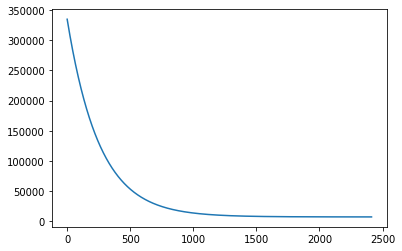

In [52]:
plt.plot(cost_list);

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [53]:
print(y)

[152 185 180 196 142 101 149 115 175 164 141 141 184 152 148 192 147 183
 177 159 177 175 175 149 192]


In [54]:
y_pred = x @ theta[-1]

In [55]:
y_pred

array([162.56713711, 196.29764471, 192.8658098 , 210.20299264,
       149.95752419, 111.20966568, 157.55806566, 117.00528554,
       184.01507033, 171.07841885, 151.91147602, 150.34665866,
       199.02572577, 165.32419627, 158.46052647, 199.29894785,
       157.54150675, 188.837854  , 189.57886539, 169.62951389,
       184.71054471, 184.34624861, 175.98813682, 163.41164172,
       203.1447556 ])

### Plot loss vs. iterations

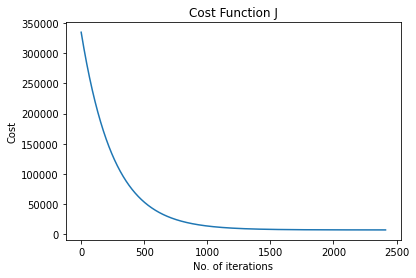

In [56]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_list)
plt.show()

#### Use R2 score to evaluate LR equation output

In [57]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.8089164450909526

# Bonus
## LR Using sklearn

### Single Variable

In [58]:
x=df.iloc[: , :-1].values
y=df.iloc[: , -1].values

In [59]:
x.shape

(13, 1)

In [60]:
x

array([[2.9000001 ],
       [6.69999981],
       [4.9000001 ],
       [7.9000001 ],
       [9.80000019],
       [6.9000001 ],
       [6.0999999 ],
       [6.19999981],
       [6.        ],
       [5.0999999 ],
       [4.69999981],
       [4.4000001 ],
       [5.80000019]])

In [61]:
y.shape

(13,)

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [62]:
from sklearn import linear_model

In [63]:
regr = linear_model.LinearRegression()


#### Train the model (fit the model to the training data)

In [64]:
regr.fit(x, y)

LinearRegression()

#### Predict y values using the trained model

In [65]:
y_pred = regr.predict(x)

In [66]:
y_pred

array([3.44824549, 6.08745623, 4.83730388, 6.92089146, 8.240497  ,
       6.22636227, 5.67073878, 5.74019163, 5.60128593, 4.97620959,
       4.69839784, 4.49003928, 5.46238022])

In [67]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

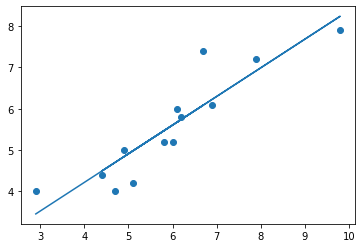

In [68]:
plt.scatter(x , y)
plt.plot(x,y_pred)

#### Use R2 score to evaluate model output

In [69]:
r2_score(y, y_pred)

0.8213156778363777

### Repeat for Mulivariate

In [70]:
x=df2.iloc[:, :-1].values
y=df2.iloc[: , -1].values

In [71]:
x

array([[ 73,  80,  75],
       [ 93,  88,  93],
       [ 89,  91,  90],
       [ 96,  98, 100],
       [ 73,  66,  70],
       [ 53,  46,  55],
       [ 69,  74,  77],
       [ 47,  56,  60],
       [ 87,  79,  90],
       [ 79,  70,  88],
       [ 69,  70,  73],
       [ 70,  65,  74],
       [ 93,  95,  91],
       [ 79,  80,  73],
       [ 70,  73,  78],
       [ 93,  89,  96],
       [ 78,  75,  68],
       [ 81,  90,  93],
       [ 88,  92,  86],
       [ 78,  83,  77],
       [ 82,  86,  90],
       [ 86,  82,  89],
       [ 78,  83,  85],
       [ 76,  83,  71],
       [ 96,  93,  95]], dtype=int64)

In [72]:
y

array([152, 185, 180, 196, 142, 101, 149, 115, 175, 164, 141, 141, 184,
       152, 148, 192, 147, 183, 177, 159, 177, 175, 175, 149, 192],
      dtype=int64)

In [73]:
regr.fit(x, y)

LinearRegression()

In [74]:
y_pred = regr.predict(x)

In [75]:
y_pred

array([152.60720439, 185.08011472, 181.78158547, 199.74522647,
       139.1747207 , 103.69391793, 150.2632274 , 112.82069728,
       174.55948394, 164.49442094, 143.42337551, 142.23416416,
       186.54285759, 152.40794527, 151.24409108, 189.12496613,
       143.50219218, 181.89389361, 177.29838914, 158.34934019,
       176.57742415, 174.66365778, 167.68889392, 150.63279846,
       191.1954116 ])

In [76]:
r2_score(y, y_pred)

0.9896615789448399